In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

data=pd.read_csv('../Feature Engineering/data_post_pca.csv')

X_pca = data.drop('label', axis=1)
y = data['label']

# from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)


import pandas as pd
from sklearn.utils import resample

df_train=X_train
df_train['label']=y_train
def upsample(data):
    # Load dataset
#     data = pd.read_csv('feature_Engineered_train.csv')
    # Separate data by label
    class0 = data[data['label'] == 0]
    class1 = data[data['label'] == 1]

    # Upsample minority class 1
    class1_upsampled = resample(class1, replace=True, n_samples=len(class0), random_state=123)

    # Combine upsampled data with original class 0 data
    upsampled_data = pd.concat([class0, class1_upsampled])

#     upsampled_data.to_csv('feature_Engineered_train_upsampled.csv', index=False)
    # Print the upsampled data
    return upsampled_data
df_train=upsample(df_train)
X_train=df_train.drop('label',axis=1)
y_train=df_train['label']



model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[-1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


y_pred=model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]


Epoch 1/20
  1/783 [..............................] - ETA: 2:22 - loss: 0.6714 - accuracy: 0.6562

2023-05-03 08:22:59.853144: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


783/783 [==============================] - 1s 849us/step - loss: 0.3959 - accuracy: 0.8025 - val_loss: 0.1951 - val_accuracy: 0.8921
Epoch 2/20
783/783 [==============================] - 1s 749us/step - loss: 0.1644 - accuracy: 0.9290 - val_loss: 0.2166 - val_accuracy: 0.8847
Epoch 3/20
783/783 [==============================] - 1s 759us/step - loss: 0.1263 - accuracy: 0.9520 - val_loss: 0.1269 - val_accuracy: 0.9299
Epoch 4/20
783/783 [==============================] - 1s 754us/step - loss: 0.1209 - accuracy: 0.9543 - val_loss: 0.1312 - val_accuracy: 0.9321
Epoch 5/20
783/783 [==============================] - 1s 738us/step - loss: 0.1100 - accuracy: 0.9596 - val_loss: 0.1707 - val_accuracy: 0.9292
Epoch 6/20
783/783 [==============================] - 1s 700us/step - loss: 0.1216 - accuracy: 0.9487 - val_loss: 0.1491 - val_accuracy: 0.9305
Epoch 7/20
783/783 [==============================] - 1s 695us/step - loss: 0.1271 - accuracy: 0.9588 - val_loss: 0.2384 - val_accuracy: 0.8803
Epo

Accuracy: 0.9247198139141467
Precision: 0.7017841971112999
Recall: 0.9939831528279182
F1 Score: 0.8227091633466136
Confusion Matrix [[3547  351]
 [   5  826]]


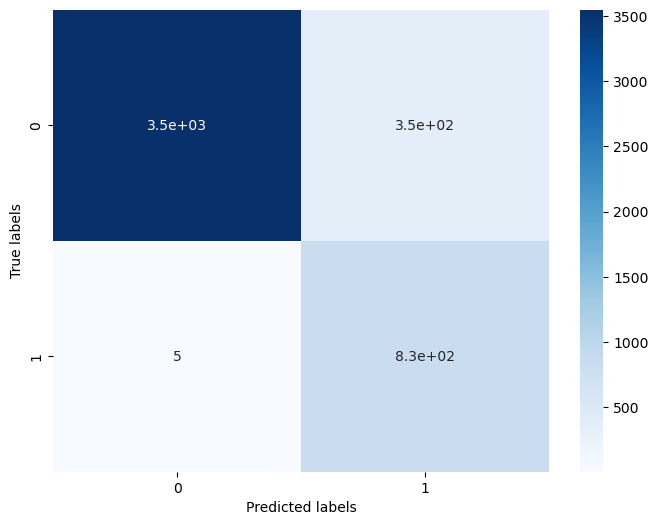

In [2]:
%run performance.ipynb
 
performance_scores(y_pred,y_test)

In [3]:
# import numpy as np
# import keras
# from keras.datasets import cifar100
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
# import matplotlib.pyplot as plt

# def train_model(model):
#   # Train model
#   history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_val, y_val))
#   # Evaluate model on test set
#   score = model.evaluate(x_test, y_test, verbose=0)
#   print('Test accuracy:', score[1])
#   results[score[1]]=model
#   # Plotting the learning curve 
#   train_acc = history.history['accuracy']
#   val_acc = history.history['val_accuracy']

#   epochs = range(1, len(train_acc) + 1)
#   plt.plot(epochs, train_acc, 'bo', label='Training Acc')
#   plt.plot(epochs, val_acc, 'b', label='Validation Acc')
#   plt.title('Training and Validation Acc')
#   plt.xlabel('Epochs')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.show()
#   return val_acc[-1]

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_auc_score

data = pd.read_csv('../Feature Engineering/data_post_pca.csv')

X_pca = data.drop('label', axis=1)
y = data['label']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model
def create_model(loss='binary_crossentropy', activation='relu', optimizer=Adam(lr=0.01), units1=64, units2=128, units3=128, units4=64, units5=32):
    model = Sequential()
    model.add(Dense(units1, input_dim=X_train.shape[-1], activation=activation))
    model.add(Dense(units2, activation=activation))
    model.add(Dense(units3, activation=activation))
    model.add(Dense(units4, activation=activation))
    model.add(Dense(units5, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the hyperparameters to tune
param_grid = {
    'loss': ['binary_crossentropy', 'hinge'],
    'activation': ['relu', 'sigmoid'],
    'optimizer': [Adam(lr=0.01)],
    'units1': [32, 64, 128],
    'units2': [64, 128, 256],
    'units3': [64, 128, 256],
    'units4': [32, 64, 128],
    'units5': [16, 32, 64]
}

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding model accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the test set
_, accuracy = grid_result.best_estimator_.model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Predict probabilities and calculate AUC
y_prob = grid_result.best_estimator_.model.predict(X_test)
auc = roc_auc_score(y_test, y_prob)
print("AUC: %.2f%%" % (auc * 100.0))


/Users/pratikjadhav/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/var/folders/g2/vk4vm02n3cng67bqls1m0knw0000gn/T/ipykernel_93440/3159341364.py:46: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
2023-05-03 08:23:15.738537: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 08:23:15.741858: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 08:23:15.772154: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 08:23:15.782459: W tensorflow/core/platform/profi

KeyboardInterrupt: 